# Credit Card Fraud detection using Logistic Regression

In [ ]:
#Read the data set.
#Do data pre-processing.
#Split the data into train and test.
#Build the logistic model.
#Train the classifier.
#Test the classifier with test data.
#Measure precision,recall and f1-score and accuracy of the model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#identifying dependent and independent varaible
X = data.iloc[:, 1:30].columns
y = data['Class']
X = data[X]

In [6]:
count = data['Class'].value_counts()
print("Total count in each class\n\n",count)
print("\n")

Total count in each class

 0    284315
1       492
Name: Class, dtype: int64




In [7]:
#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Build the model
clf = LogisticRegression()

In [9]:
# Train the classifier
clf.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
#test the model
y_pred = clf.predict(X_test)

In [11]:
#classification report
cr = (classification_report(y_test, y_pred))

In [12]:
#confusion matrix
cm = (metrics.confusion_matrix(y_test, y_pred))
print("Confusion Matrix:\n\n",cm,"\n")

Confusion Matrix:

 [[56855     9]
 [   42    56]] 



In [13]:
#classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [19]:
#Accuracy score
a= (metrics.accuracy_score(y_test, y_pred))
print("Accuracy score:",round(a,1))

Accuracy score: 1.0


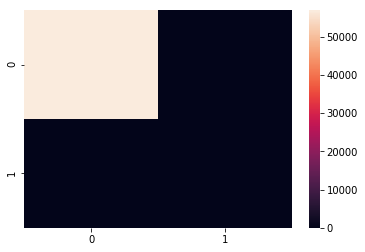

In [15]:
#heat map for confusion matrix
#fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(cm)#, annot=True, fmt='d')
plt.show()

In [16]:
#print the actual and predicted labels
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(df1.head(25))

        Actual  Predicted
43428        1          1
49906        0          0
29474        0          0
276481       0          0
278846       0          0
101565       0          0
260880       0          0
214337       0          0
201575       0          0
81055        0          0
134976       0          0
237701       0          0
256836       0          0
97650        0          0
158290       0          0
246697       0          0
68279        0          0
267585       0          0
26525        0          0
74422        0          0
206357       0          0
257395       0          0
283656       0          0
231156       0          0
38442        0          0


Roc Curve evaluation


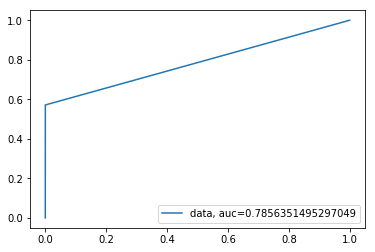

In [18]:
#ROC curve evaluation
print("Roc Curve evaluation")
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()